# Lab-09

### Mrinal Bhan
#### *211020428, DSAI*

### Tasks

Experiment Number -01: Write a program to implement the Real-time Video Processing:
- Experiment: Implement real-time video processing techniques: face recognition and object
tracking on a live video stream.
- Example identification of (1) single face and multiple faces from video, (2) identification of
person.

#### Importing dependencies and applying face Recognition on image first

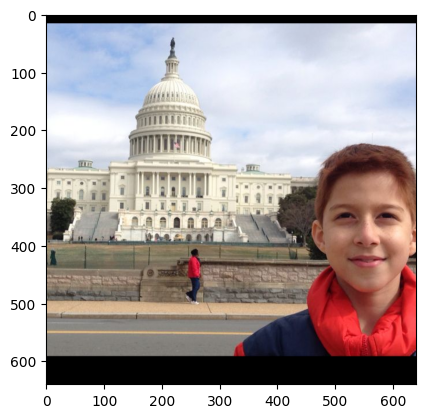

In [1]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("test.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

#### Using Haarcascade Face Classifier

In [2]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [3]:
face = face_classifier.detectMultiScale(
    image_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [4]:
for (x, y, w, h) in face:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 4)

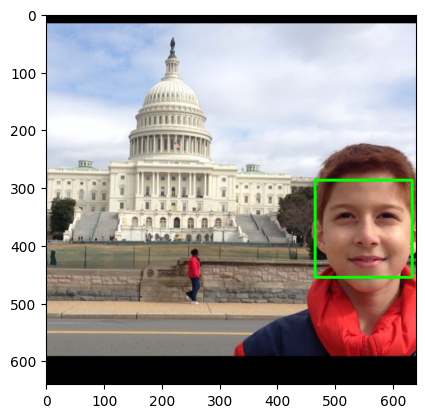

In [5]:
plt.imshow(image_rgb)

## Doing the Same thing but on real time video

In [6]:
video_capture = cv2.VideoCapture(0)

In [7]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

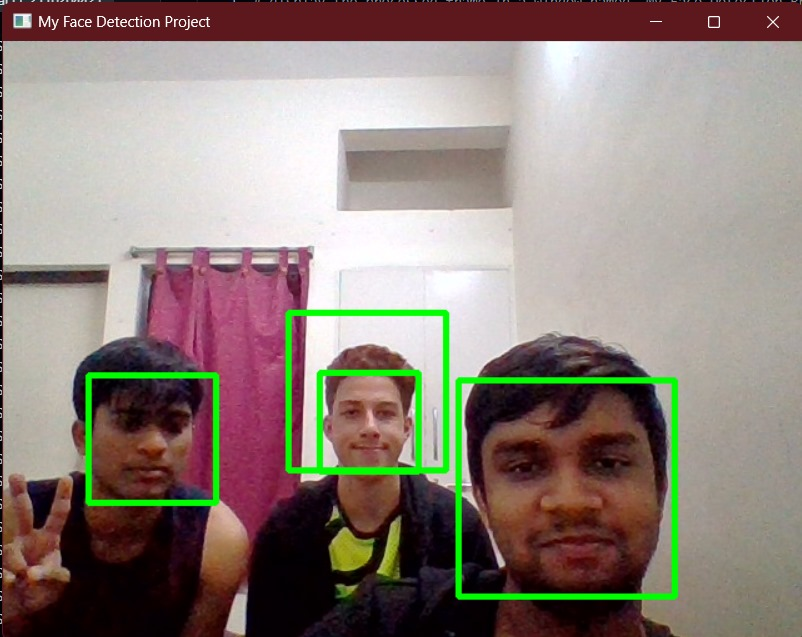